In [37]:
import numpy as np 
import matplotlib.pyplot as plt 

dx = np.linspace(1, 10, 15) 
dx = dx + np.random.random(x.shape) * (2 * dx)
x = np.add.accumulate(dx)
data = 1 + 0.25 * np.random.random(x.shape)
x

array([  1.21229681,   3.0043339 ,   8.12386679,  12.31536644,
        22.98171938,  32.51158348,  38.49514795,  45.70600596,
        61.00853787,  73.45670969,  88.84070862, 105.03031645,
       129.93930427, 157.02850922, 181.03505539])

(1.0, 1.25)

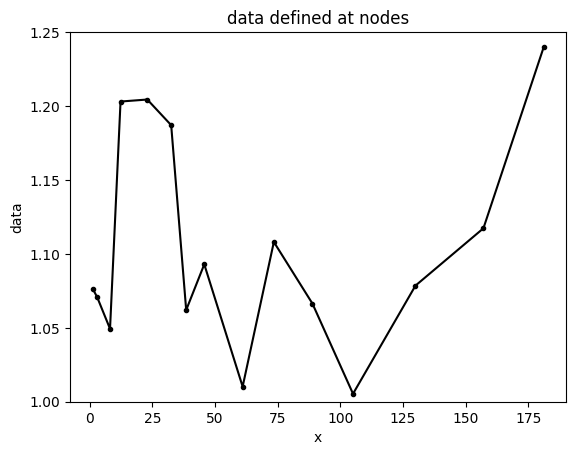

In [48]:
plt.plot(x, data, "k", marker=".")
plt.xlabel("x")
plt.ylabel("data")
plt.title("data defined at nodes")
plt.ylim([1., 1.25])

assume the above is our input. we have data, defined at nodes and want to approximate a stretched grid. 

The following is a simple, but turns out not great, approach to building cells around the given nodes.

1. find the point halfway between each node
2. use the half points as cell edges to calculate cell widths


(1.0, 1.25)

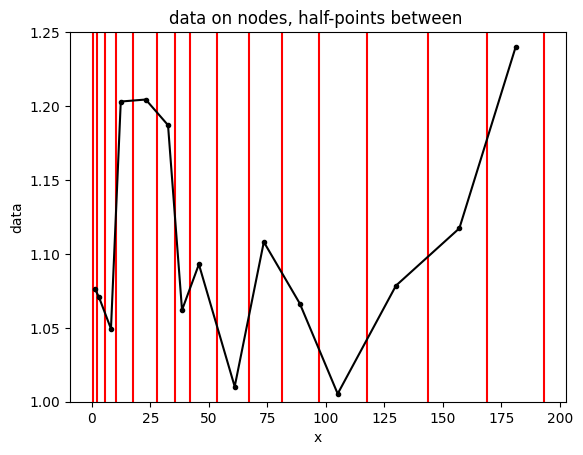

In [52]:
x_edges = (x[0:-1] + x[1:])/2.  # halfway between each point
dx_obs = x_edges[1:] - x_edges[0:-1]  # distance between half-points

# pad the start and end 
dx_0 = np.array([2 * (x_edges[0] - x[0])]) 
dx_end = np.array([2 * (x[-1] - x_edges[-1])])
dx_obs = np.concatenate([dx_0, dx_obs, dx_end])
x_edges = np.concatenate([x_edges[0]-dx_0, x_edges, x_edges[-1]+dx_end])


for edge in x_edges:
    plt.plot([edge, edge], [0, 2], 'r')
plt.plot(x, data, "k", marker=".")


plt.xlabel("x")
plt.ylabel("data")
plt.title("data on nodes, half-points between ")
plt.ylim([1., 1.25])

the issue is that if we round-trip this approach and calculate a cell center from the edges, it will end up offsetting the data by an amount (probably proportional to the spatial dertivated of the cell width):

(1.0, 1.25)

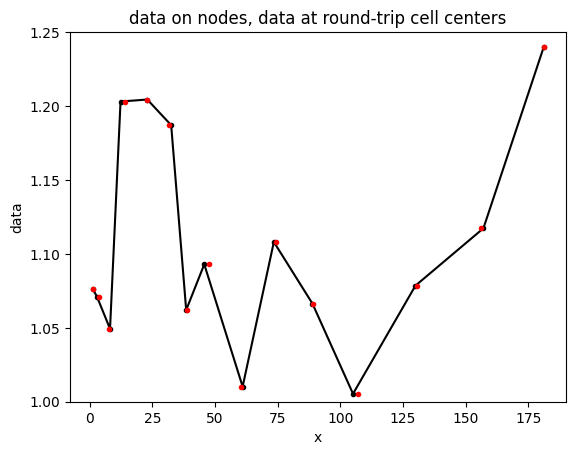

In [55]:
x_centers = (x_edges[0:-1] + x_edges[1:])/2.0

plt.plot(x, data, "k", marker=".")
plt.plot(x_centers, data, '.r')
plt.xlabel("x")
plt.ylabel("data")
plt.title("data on nodes, data at round-trip cell centers")
plt.ylim([1., 1.25])

easy to see some spots where this is bad...